In [1]:
import os
import re
import spacy
import gensim
import random
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from datetime import datetime
from wordcloud import WordCloud
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [2]:
spacy_model = 'en_core_web_lg'

In [3]:
nlp = spacy.load(spacy_model)

In [4]:
cdxData = pd.read_csv('CDX Indices Matrix .csv', encoding='UTF-8')
tickerList = set(cdxData['Unnamed: 0'])
print(tickerList)  

{'BA-CapCorp', 'ARCOINC', 'PBI', 'RAI', 'DOW', 'CELARA', 'SGR', 'GENWHOL', 'TRADIG', 'HNTINL', 'AES', 'MEX', 'DEXBB-AGM', 'WY', 'EDS', 'REI', 'BAUSHEA', 'UPS', 'CHINA', 'SFI', 'BOMB', 'VZINC', 'ANYWHRE', 'MBI', 'GRBICV', 'MARAPET', 'UCOHLD', 'SERVIPR', 'TRI', 'PERU', 'CZN', 'FCH-LP', 'ARAMSER', 'DNY', 'GT', 'BBVSM-Bancomer', 'BPLP', 'HET-OpCo', 'LMLLC', 'CSC', 'SO', 'SLE', 'DAVIHEA', 'CCR-HomeLoans', 'AT', 'VISTOPE', 'IBM', 'PKS', 'PHMG', 'COF', 'CNG', 'DGCGR', 'MGG', 'DYNHLD', 'DAL', 'PTV', 'CHK', 'PFE', 'BOMBINC', 'NINEWES', 'UNP', 'GENMC', 'TXT-FinCorp', 'URBISA', 'CEMSAB', 'ALL', 'CYH', 'POSTHOL', 'SBIIN-StateBkIn', 'R', 'WEN', 'OGXPET', 'NRUC', 'XEL-NRGInc', 'CEG', 'JWN', 'RYL', 'LNC', 'VLOC', 'DCN', 'HRB-Fllc', 'GE-GNWTH', 'NWL', 'WHPEC', 'LPX', 'MGMRI', 'UHS', 'CHTR-Holdings', 'AMT', 'L', 'GMT', 'PHM', 'TGRI-Ptnr', 'DE', 'EXPEGRO', 'COOPER', 'SBC', 'ECACN', 'BLL', 'OKE', 'HOV-K', 'BDK', 'KMG', 'ALLYFI', 'COF-Bank', 'LVLT', 'NXTENG', 'MAY', 'NEM', 'MEE', 'KRAFHEI', 'TJX', 'PHHCO'

In [5]:
sp500Data = pd.read_csv('/Users/noahlevine/Desktop/NLP Project/Earnings-Calls-NLP/sandp500.csv', encoding='UTF-8')
spTickerList = set(sp500Data['Symbol']) 

print(spTickerList)

{'SWKS', 'ILMN', 'TROW', 'ALXN', 'CDW', 'DOW', 'MGM', 'LYV', 'PLD', 'ADP', 'AES', 'AKAM', 'ORLY', 'WY', 'UPS', 'LHX', 'IPGP', 'PH', 'CINF', 'MTD', 'WST', 'RL', 'BIO', 'ADSK', 'INTU', 'KLAC', 'NEE', 'PAYC', 'SBUX', 'PPL', 'SO', 'UAA', 'AFL', 'SJM', 'FANG', 'NLSN', 'AVY', 'IBM', 'MSI', 'COF', 'FTNT', 'TT', 'DAL', 'PFE', 'KSU', 'JBHT', 'SWK', 'UNP', 'VTR', 'PFG', 'DISCK', 'KHC', 'ALL', 'ROL', 'FFIV', 'DRE', 'CHD', 'DLR', 'ODFL', 'MS', 'XRAY', 'TXT', 'IFF', 'LNC', 'DVA', 'NWL', 'APTV', 'SLB', 'VRSK', 'UHS', 'POOL', 'CARR', 'SNPS', 'GOOGL', 'L', 'AMT', 'PHM', 'CDNS', 'DE', 'ATO', 'TPR', 'BLL', 'SCHW', 'ZBH', 'OKE', 'CTVA', 'DXCM', 'ULTA', 'HBI', 'NEM', 'RJF', 'BRK.B', 'TJX', 'TAP', 'DPZ', 'VNT', 'ACN', 'FDX', 'IRM', 'SEE', 'MRK', 'DISCA', 'WELL', 'JCI', 'IVZ', 'CXO', 'K', 'YUM', 'OTIS', 'CTXS', 'AMAT', 'DVN', 'BBY', 'KEYS', 'CBOE', 'PNR', 'CME', 'BIIB', 'ETR', 'ED', 'UAL', 'IT', 'WLTW', 'BAC', 'TEL', 'RHI', 'ZBRA', 'HPE', 'ROK', 'CSX', 'MKTX', 'ROST', 'LIN', 'EMN', 'VTRS', 'EQIX', 'FTI', 'A

In [6]:
cdx_df = pd.read_csv('/Users/noahlevine/Desktop/NLP Project/CDXSpreadDataShorten .csv', encoding='UTF-8')
cdxTickerList = set(cdx_df['Stock Ticker'])
print(cdxTickerList)

{'SO', 'ORCL', 'DHR', 'MO', 'FCX', 'FDX', 'DE', 'SPG', 'COP', 'COXENT', 'MDC', 'JCI', 'COF', 'MSI', 'CMCSA', 'BWA', 'BRK.A', 'AES', 'CAG', 'TMUS', 'KMI', 'CSCO', 'T', 'NOC', 'HST', 'AGO', 'RTX', 'IP', 'NEM', 'WMB', 'TRGP', 'MDLZ', 'PARA', 'NEE', 'PKG', 'DELL'}


In [7]:
# find matches in Sp500 and CDX
matches = []
for ticker in tickerList:
    if ticker in spTickerList and ticker in cdxTickerList:
        matches.append(ticker)
matches_sorted = sorted(matches)
print(matches_sorted)
match_count = len(matches)
print(f"match count: {match_count}")

['AES', 'BWA', 'CAG', 'CMCSA', 'COF', 'COP', 'CSCO', 'DE', 'DHR', 'FCX', 'FDX', 'IP', 'JCI', 'MO', 'NEM', 'NOC', 'SO', 'T', 'WMB']
match count: 19


In [8]:
folder_path = 'transcripts/sandp500'  # path to text files
#file_contents = [] # for TF-IDF conversion
data = []  # List to store the data for DataFrame

# Regular expression pattern for extracting date
pattern = r'(?i)(January|February|March|April|May|June|July|August|September|October|November|December)\s+(\d{1,2}),\s*(\d{4})'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):  # Consider only text files
        file_path = os.path.join(folder_path, file_name)
       

        # Extract the title in parentheses
        title = file_name.split('(')[-1].split(')')[0]
        file_contents = [] # for TF-IDF conversion
        #print(title) # extract whats in parenthesis, name it "title"

        if title in matches:
            with open(file_path, 'r', encoding='latin-1') as file:
                content = file.read().lower() # Convert content to lowercase
                # Correct spacing problems caused by paragraph breaks
                content = re.sub(r'\.([a-zA-Z])', r'. \1', content)
                content = re.sub(r'\?([a-zA-Z])', r'. \1', content)
                content = re.sub(r'\!([a-zA-Z])', r'. \1', content)

                file_contents.append(content)
                
            # Search for date in file contents
            match = re.search(pattern, content)
            if match:
                month_str, day_str, year_str = match.groups()
                month = datetime.strptime(month_str, "%B").month
                day = int(day_str)
                year = int(year_str)

                data.append({'Ticker': title, 'Transcript': file_contents, 'Month': month, 'Day': day, "Year": year})

df = pd.DataFrame(data)
sorted_data = sorted(data, key=lambda x: (x['Year'], x['Month'], x['Day']))
df = pd.DataFrame(sorted_data)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# print(df[['Ticker', 'Date', 'Transcript']])
# targets = [random.randint(0, 1) for _ in range(1245)]  # hallucinate some fake targets until we have real target
# df.insert(4, 'Targets', targets)  # Add the 'Targets' column after 'Year'

# print(df[['Ticker', 'Date', 'Transcript', 'Targets']])
df

,Ticker,Transcript,Month,Day,Year,Date
0,FDX,[fedex corporation (nyse:fdx) q2 2018 results ...,12,19,2017,2017-12-19
1,FDX,[fedex corporation (nyse:fdx) q3 2018 results ...,3,20,2018,2018-03-20
2,CAG,"[conagra brands, inc. (nyse:cag) q3 2019 resul...",3,21,2018,2018-03-21
3,COF,[capital one financial corp. (nyse:cof) q1 201...,4,24,2018,2018-04-24
4,SO,[the southern co. (nyse:so) q1 2018 earnings c...,5,2,2018,2018-05-02
...,...,...,...,...,...,...
158,NOC,[northrop grumman (nyse:noc) baird 2020 global...,11,11,2020,2020-11-11
159,CSCO,"[cisco systems, inc. (nasdaq:csco) q1 2021 res...",11,21,2020,2020-11-21
160,DE,[deere & company (nyse:de) q4 2020 earnings co...,11,25,2020,2020-11-25
161,FCX,[freeport-mcmoran inc. (nyse:fcx) citi basic m...,12,2,2020,2020-12-02


In [80]:
 #df = df.iloc[0:10, :]

In [9]:
additional_stop_words = ['hi', 'earning', 'conference', 'speaker', 'analyst', 'operator', 'welcome', \
                         'think', 'cost', 'result', 'primarily', 'overall', 'line', 'general', \
                         'thank', 'see', 'alphabet', 'google', 'facebook', 'amazon', 'microsoft',\
                         'business', 'customer', 'revenue', 'question', 'lady', 'gentleman', \
                         'continue', 'continuing', 'continued', 'focus', 'participant', 'see', 'seeing', \
                         'user', 'work', 'lot', 'day',  'like', 'looking', 'look', 'come', 'yes', 'include', \
                         'investor', 'director', 'expense', 'manager', 'founder', 'chairman', \
                         'chief', 'operating', 'officer', 'executive', 'financial', 'senior', 'vice', 'president', \
                         'opportunity', 'go', 'expect', 'increase', 'quarter', 'stand', 'instructions', \
                         'obviously', 'thing', 'important', 'help', 'bring', 'mention', 'yeah', 'get', 'proceed', \
                         'currency', 'example', 'believe', 'nyse', 'et'] 

for stopword in additional_stop_words:
    nlp.vocab[stopword].is_stop = True

In [10]:
def get_cleaned_word_list(df_row):
    """
    Returns the list of words after removing non-alphanumeric words, stop words, prepositions and names of person
    """
    print(f"Processing {df_row['Ticker']}, Month: {df_row['Month']}, Year: {df_row['Year']}")
    words = []
    conf_text = df_row['Transcript'][0]
    doc = nlp(conf_text)
    with doc.retokenize() as retokenizer:
        for ent in doc.ents:
            # print(ent.text, ent.label_)
            retokenizer.merge(doc[ent.start:ent.end], attrs={"LEMMA": ent.text})
    print('-------------------')
    for word in doc:
        # print(word, word.lemma_, word.ent_type_)
        if word.is_alpha and word.is_ascii and not word.is_stop and \
            word.ent_type_ not in ['PERSON','DATE', 'TIME', 'ORDINAL', 'CARDINAL'] and \
            word.text.lower() not in additional_stop_words and \
            word.lemma_.lower() not in additional_stop_words:
                #print(word)
                words.append(word.lemma_.lower())
    return words

In [11]:
df['Words'] = df.apply(get_cleaned_word_list, axis=1)

Processing FDX, Month: 12, Year: 2017
-------------------
Processing FDX, Month: 3, Year: 2018
-------------------
Processing CAG, Month: 3, Year: 2018
-------------------
Processing COF, Month: 4, Year: 2018
-------------------
Processing SO, Month: 5, Year: 2018
-------------------
Processing FDX, Month: 6, Year: 2018
-------------------
Processing COF, Month: 7, Year: 2018
-------------------
Processing IP, Month: 7, Year: 2018
-------------------
Processing BWA, Month: 7, Year: 2018
-------------------
Processing JCI, Month: 7, Year: 2018
-------------------
Processing SO, Month: 8, Year: 2018
-------------------
Processing DE, Month: 8, Year: 2018
-------------------
Processing FDX, Month: 9, Year: 2018
-------------------
Processing CAG, Month: 9, Year: 2018
-------------------
Processing COF, Month: 10, Year: 2018
-------------------
Processing NOC, Month: 10, Year: 2018
-------------------
Processing COP, Month: 10, Year: 2018
-------------------
Processing BWA, Month: 10, Year

In [12]:
df

,Ticker,Transcript,Month,Day,Year,Date,Words
0,FDX,[fedex corporation (nyse:fdx) q2 2018 results ...,12,19,2017,2017-12-19,"[fedex, corporation, relation, ceo, cfo, couns..."
1,FDX,[fedex corporation (nyse:fdx) q3 2018 results ...,3,20,2018,2018-03-20,"[fedex, corporation, ceo, coo, counsel, secret..."
2,CAG,"[conagra brands, inc. (nyse:cag) q3 2019 resul...",3,21,2018,2018-03-21,"[cag, company, ceo, cfo, rob, suisse, good, mo..."
3,COF,[capital one financial corp. (nyse:cof) q1 201...,4,24,2018,2018-04-24,"[global, finance, suisse, sanjay, sakhrani, we..."
4,SO,[the southern co. (nyse:so) q1 2018 earnings c...,5,2,2018,2018-05-02,"[southern, isi, credit, suisse, security, llc,..."
...,...,...,...,...,...,...,...
158,NOC,[northrop grumman (nyse:noc) baird 2020 global...,11,11,2020,2020-11-11,"[noc, baird, global, industrial, company, ceo,..."
159,CSCO,"[cisco systems, inc. (nasdaq:csco) q1 2021 res...",11,21,2020,2020-11-21,"[nasdaq, company, relation, investment, resear..."
160,DE,[deere & company (nyse:de) q4 2020 earnings co...,11,25,2020,2020-11-25,"[de, company, cfo, technology, brent, norwood,..."
161,FCX,[freeport-mcmoran inc. (nyse:fcx) citi basic m...,12,2,2020,2020-12-02,"[fcx, citi, basic, material, virtual, company,..."


In [13]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert the list of words to a string
df['Words'] = df['Words'].apply(lambda x: ' '.join(x))

# Fit and transform the 'Words' column to calculate TF-IDF weights
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Words'])

In [14]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_weights = tfidf_matrix.toarray()
tfidf_weights

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
num_top_words = 2000  # Number of top words to keep

for i, weights in enumerate(tfidf_weights):
    top_words_indices = weights.argsort()[-num_top_words:][::-1]
    top_words = [feature_names[idx] for idx in top_words_indices]
    df.at[i, 'Words'] = top_words

In [18]:
sentiments = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining']
#sentiments = ['negative', 'positive']
sentiment_df = pd.read_csv('Loughran-McDonald_MasterDictionary_1993-2021.csv')
sentiment_df.columns = [column.lower() for column in sentiment_df.columns] # Lowercase the columns for ease of use

# Remove unused information
sentiment_df = sentiment_df[sentiments + ['word']]
sentiment_df[sentiments] = sentiment_df[sentiments].astype(bool)
sentiment_df = sentiment_df[sentiment_df[sentiments].any(axis=1)]
word_list = nlp(" ".join(sentiment_df['word'].str.lower()))
word_lemmas = []
for word in word_list:
    # print(word.text, word.lemma_)
    word_lemmas.append(word.lemma_)
sentiment_df.insert(loc=6, column='lemma', value=word_lemmas)
sentiment_df = sentiment_df.drop_duplicates('lemma')

In [19]:
df = df.reindex(columns= df.columns.to_list() + sentiments)

In [20]:
sentiment_vectorizer = CountVectorizer()

In [21]:
def get_sentiment_info(df_row, sentiment_vectorizer):
    """
    Get count of the words of a particular sentiment in the transcript
    Parameters
    ----------
    df_row : dataframe row
       The row of the dataframe with words_ngrams
    sentiment_vectorizer: sentiment_vectorizer instance
        To count the instance of the word sentiment
    """
    
    vector = sentiment_vectorizer.transform([" ".join(df_row['Words'])])
    return np.sum(vector.toarray())

In [22]:
for sentiment in sentiments:
    sentiment_words = sentiment_df.loc[sentiment_df[sentiment],'lemma']
    sentiment_vectorizer.fit(sentiment_words)
    df[sentiment] = df.apply(get_sentiment_info, args=(sentiment_vectorizer, ), axis=1)

In [23]:
df

,Ticker,Transcript,Month,Day,Year,Date,Words,negative,positive,uncertainty,litigious,constraining
0,FDX,[fedex corporation (nyse:fdx) q2 2018 results ...,12,19,2017,2017-12-19,"[fedex, cyberattack, tnt, ground, rajesh, expr...",73,82,15,14,6
1,FDX,[fedex corporation (nyse:fdx) q3 2018 results ...,3,20,2018,2018-03-20,"[fedex, express, fy, raj, network, freight, tn...",88,77,18,13,8
2,CAG,"[conagra brands, inc. (nyse:cag) q3 2019 resul...",3,21,2018,2018-03-21,"[pinnacle, conagra, brand, legacy, frozen, inn...",75,77,19,8,5
3,COF,[capital one financial corp. (nyse:cof) q1 201...,4,24,2018,2018-04-24,"[card, growth, loan, auto, vintage, capital, s...",125,77,22,8,13
4,SO,[the southern co. (nyse:so) q1 2018 earnings c...,5,2,2018,2018-05-02,"[southern, equity, llc, art, inc, tax, georgia...",64,70,22,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...
158,NOC,[northrop grumman (nyse:noc) baird 2020 global...,11,11,2020,2020-11-11,"[program, unmanned, orbital, atk, growth, spac...",90,71,16,10,5
159,CSCO,"[cisco systems, inc. (nasdaq:csco) q1 2021 res...",11,21,2020,2020-11-21,"[cisco, cloud, software, security, enterprise,...",94,74,15,6,7
160,DE,[deere & company (nyse:de) q4 2020 earnings co...,11,25,2020,2020-11-25,"[ag, turf, technology, precision, margin, deer...",104,76,18,8,12
161,FCX,[freeport-mcmoran inc. (nyse:fcx) citi basic m...,12,2,2020,2020-12-02,"[copper, quirk, freeport, mining, underground,...",122,74,17,12,9


In [24]:
nlp.add_pipe('spacytextblob')

In [25]:
def get_textblob_sentiment(df_row):
    """
    Returns the sentiment of a piece of text
    """
    print(f"Processing {df_row['Ticker']}, Month: {df_row['Month']}, Year: {df_row['Year']}")
    conf_text = ' '.join(df_row['Words'])
    doc = nlp(conf_text)
    polarity = doc._.blob.polarity
    return polarity

In [26]:
df['Polarity'] = df.apply(get_textblob_sentiment, axis=1)

Processing FDX, Month: 12, Year: 2017
Processing FDX, Month: 3, Year: 2018
Processing CAG, Month: 3, Year: 2018
Processing COF, Month: 4, Year: 2018
Processing SO, Month: 5, Year: 2018
Processing FDX, Month: 6, Year: 2018
Processing COF, Month: 7, Year: 2018
Processing IP, Month: 7, Year: 2018
Processing BWA, Month: 7, Year: 2018
Processing JCI, Month: 7, Year: 2018
Processing SO, Month: 8, Year: 2018
Processing DE, Month: 8, Year: 2018
Processing FDX, Month: 9, Year: 2018
Processing CAG, Month: 9, Year: 2018
Processing COF, Month: 10, Year: 2018
Processing NOC, Month: 10, Year: 2018
Processing COP, Month: 10, Year: 2018
Processing BWA, Month: 10, Year: 2018
Processing IP, Month: 10, Year: 2018
Processing MO, Month: 10, Year: 2018
Processing SO, Month: 11, Year: 2018
Processing JCI, Month: 11, Year: 2018
Processing DE, Month: 11, Year: 2018
Processing FDX, Month: 12, Year: 2018
Processing CAG, Month: 12, Year: 2018
Processing COF, Month: 1, Year: 2019
Processing FCX, Month: 1, Year: 20

In [27]:
df.to_csv("Processed Shorten.csv", index=False) 

In [28]:
df = pd.read_csv("Processed Shorten.csv")

In [29]:
df

,Ticker,Transcript,Month,Day,Year,Date,Words,negative,positive,uncertainty,litigious,constraining,Polarity
0,FDX,['fedex corporation (nyse:fdx) q2 2018 results...,12,19,2017,2017-12-19,"['fedex', 'cyberattack', 'tnt', 'ground', 'raj...",73,82,15,14,6,0.137240
1,FDX,"[""fedex corporation (nyse:fdx) q3 2018 results...",3,20,2018,2018-03-20,"['fedex', 'express', 'fy', 'raj', 'network', '...",88,77,18,13,8,0.136254
2,CAG,"[""conagra brands, inc. (nyse:cag) q3 2019 resu...",3,21,2018,2018-03-21,"['pinnacle', 'conagra', 'brand', 'legacy', 'fr...",75,77,19,8,5,0.139583
3,COF,"[""capital one financial corp. (nyse:cof) q1 20...",4,24,2018,2018-04-24,"['card', 'growth', 'loan', 'auto', 'vintage', ...",125,77,22,8,13,0.112936
4,SO,"[""the southern co. (nyse:so) q1 2018 earnings ...",5,2,2018,2018-05-02,"['southern', 'equity', 'llc', 'art', 'inc', 't...",64,70,22,11,10,0.142904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,NOC,"[""northrop grumman (nyse:noc) baird 2020 globa...",11,11,2020,2020-11-11,"['program', 'unmanned', 'orbital', 'atk', 'gro...",90,71,16,10,5,0.129559
159,CSCO,"[""cisco systems, inc. (nasdaq:csco) q1 2021 re...",11,21,2020,2020-11-21,"['cisco', 'cloud', 'software', 'security', 'en...",94,74,15,6,7,0.122726
160,DE,['deere & company (nyse:de) q4 2020 earnings c...,11,25,2020,2020-11-25,"['ag', 'turf', 'technology', 'precision', 'mar...",104,76,18,8,12,0.126828
161,FCX,"[""freeport-mcmoran inc. (nyse:fcx) citi basic ...",12,2,2020,2020-12-02,"['copper', 'quirk', 'freeport', 'mining', 'und...",122,74,17,12,9,0.132998


In [30]:
df = df[df['Ticker'].isin(cdx_df['Stock Ticker'])]
df = df.merge(cdx_df[['Stock Ticker', 'BICS Sector']], left_on='Ticker', right_on='Stock Ticker', how='left')
df = df.drop("Stock Ticker", axis=1)
cols = ['Ticker', 'BICS Sector', 'Transcript', 'Month', 'Day', 
       'Year', 'Date', 'Words', 'negative', 'positive',
       'uncertainty', 'litigious', 'constraining', 'Polarity']
df = df[cols]

In [31]:
df

,Ticker,BICS Sector,Transcript,Month,Day,Year,Date,Words,negative,positive,uncertainty,litigious,constraining,Polarity
0,FDX,Industrials,['fedex corporation (nyse:fdx) q2 2018 results...,12,19,2017,2017-12-19,"['fedex', 'cyberattack', 'tnt', 'ground', 'raj...",73,82,15,14,6,0.137240
1,FDX,Industrials,"[""fedex corporation (nyse:fdx) q3 2018 results...",3,20,2018,2018-03-20,"['fedex', 'express', 'fy', 'raj', 'network', '...",88,77,18,13,8,0.136254
2,CAG,Consumer Staples,"[""conagra brands, inc. (nyse:cag) q3 2019 resu...",3,21,2018,2018-03-21,"['pinnacle', 'conagra', 'brand', 'legacy', 'fr...",75,77,19,8,5,0.139583
3,COF,Financials,"[""capital one financial corp. (nyse:cof) q1 20...",4,24,2018,2018-04-24,"['card', 'growth', 'loan', 'auto', 'vintage', ...",125,77,22,8,13,0.112936
4,SO,Utilities,"[""the southern co. (nyse:so) q1 2018 earnings ...",5,2,2018,2018-05-02,"['southern', 'equity', 'llc', 'art', 'inc', 't...",64,70,22,11,10,0.142904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,NOC,Industrials,"[""northrop grumman (nyse:noc) baird 2020 globa...",11,11,2020,2020-11-11,"['program', 'unmanned', 'orbital', 'atk', 'gro...",90,71,16,10,5,0.129559
159,CSCO,Technology,"[""cisco systems, inc. (nasdaq:csco) q1 2021 re...",11,21,2020,2020-11-21,"['cisco', 'cloud', 'software', 'security', 'en...",94,74,15,6,7,0.122726
160,DE,Industrials,['deere & company (nyse:de) q4 2020 earnings c...,11,25,2020,2020-11-25,"['ag', 'turf', 'technology', 'precision', 'mar...",104,76,18,8,12,0.126828
161,FCX,Materials,"[""freeport-mcmoran inc. (nyse:fcx) citi basic ...",12,2,2020,2020-12-02,"['copper', 'quirk', 'freeport', 'mining', 'und...",122,74,17,12,9,0.132998


In [32]:
# Create an empty list to store transformed data frames
transformed_dfs = []

# Iterate over each row in the cds_prices_df DataFrame
for index, row in cdx_df.iterrows():
    ticker = row['Stock Ticker']
    
    # Iterate over each column (except the first four) to extract date and CDS price
    for column in row.index[4:]:
        date = pd.to_datetime(column)
        cds_price = row[column]
        
        # Create a temporary DataFrame with the transformed data
        temp_df = pd.DataFrame({
            'Date': [date],
            'Ticker': [ticker],
            'CDS Price': [cds_price]
        })
        
        # Append the temporary DataFrame to the list
        transformed_dfs.append(temp_df)

# Concatenate all the transformed data frames into a single DataFrame
cdx_transformed_df = pd.concat(transformed_dfs, ignore_index=True)

# Convert the 'Date' column to datetime data type
cdx_transformed_df['Date'] = pd.to_datetime(cdx_transformed_df['Date'])

# Convert the 'Date' column in the df DataFrame to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Merge the transformed CDS prices with the merged_df based on 'Ticker' and 'Date'
df = df.merge(cdx_transformed_df, on=['Ticker', 'Date'], how='left')

In [33]:
df

,Ticker,BICS Sector,Transcript,Month,Day,Year,Date,Words,negative,positive,uncertainty,litigious,constraining,Polarity,CDS Price
0,FDX,Industrials,['fedex corporation (nyse:fdx) q2 2018 results...,12,19,2017,2017-12-19,"['fedex', 'cyberattack', 'tnt', 'ground', 'raj...",73,82,15,14,6,0.137240,40.755
1,FDX,Industrials,"[""fedex corporation (nyse:fdx) q3 2018 results...",3,20,2018,2018-03-20,"['fedex', 'express', 'fy', 'raj', 'network', '...",88,77,18,13,8,0.136254,52.510
2,CAG,Consumer Staples,"[""conagra brands, inc. (nyse:cag) q3 2019 resu...",3,21,2018,2018-03-21,"['pinnacle', 'conagra', 'brand', 'legacy', 'fr...",75,77,19,8,5,0.139583,57.990
3,COF,Financials,"[""capital one financial corp. (nyse:cof) q1 20...",4,24,2018,2018-04-24,"['card', 'growth', 'loan', 'auto', 'vintage', ...",125,77,22,8,13,0.112936,25.530
4,SO,Utilities,"[""the southern co. (nyse:so) q1 2018 earnings ...",5,2,2018,2018-05-02,"['southern', 'equity', 'llc', 'art', 'inc', 't...",64,70,22,11,10,0.142904,61.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,NOC,Industrials,"[""northrop grumman (nyse:noc) baird 2020 globa...",11,11,2020,2020-11-11,"['program', 'unmanned', 'orbital', 'atk', 'gro...",90,71,16,10,5,0.129559,15.175
159,CSCO,Technology,"[""cisco systems, inc. (nasdaq:csco) q1 2021 re...",11,21,2020,2020-11-21,"['cisco', 'cloud', 'software', 'security', 'en...",94,74,15,6,7,0.122726,NaN
160,DE,Industrials,['deere & company (nyse:de) q4 2020 earnings c...,11,25,2020,2020-11-25,"['ag', 'turf', 'technology', 'precision', 'mar...",104,76,18,8,12,0.126828,23.740
161,FCX,Materials,"[""freeport-mcmoran inc. (nyse:fcx) citi basic ...",12,2,2020,2020-12-02,"['copper', 'quirk', 'freeport', 'mining', 'und...",122,74,17,12,9,0.132998,104.390


In [34]:
df = df.dropna(subset=['CDS Price'])

In [35]:
df = df.reset_index(drop=True)


In [36]:
num_days = 30 # Change this value to the desired number of days
for i in range(1, num_days + 1):
    cdx_transformed_next_day_df = cdx_transformed_df.copy()
    cdx_transformed_next_day_df['Date'] = cdx_transformed_next_day_df['Date'] + pd.DateOffset(days=-i)
    merge_suffix = f' Next {i} Day'
    df = df.merge(cdx_transformed_next_day_df, on=['Ticker', 'Date'], how='left', suffixes=('', merge_suffix))

In [37]:
num_months = 12  # Change this value to the desired number of months
for i in range(1, num_months + 1):
    cdx_transformed_next_month_df = cdx_transformed_df.copy()
    cdx_transformed_next_month_df['Date'] = cdx_transformed_next_month_df['Date'] + pd.DateOffset(months=-i)
    merge_suffix = f' Next {i} Month'
    df = df.merge(cdx_transformed_next_month_df, on=['Ticker', 'Date'], how='left', suffixes=('', merge_suffix))

In [38]:
df

,Ticker,BICS Sector,Transcript,Month,Day,Year,Date,Words,negative,positive,...,CDS Price Next 3 Month,CDS Price Next 4 Month,CDS Price Next 5 Month,CDS Price Next 6 Month,CDS Price Next 7 Month,CDS Price Next 8 Month,CDS Price Next 9 Month,CDS Price Next 10 Month,CDS Price Next 11 Month,CDS Price Next 12 Month
0,FDX,Industrials,['fedex corporation (nyse:fdx) q2 2018 results...,12,19,2017,2017-12-19,"['fedex', 'cyberattack', 'tnt', 'ground', 'raj...",73,82,...,46.745,49.450,NaN,49.765,49.155,NaN,52.680,53.62,55.860,56.090
1,FDX,Industrials,"[""fedex corporation (nyse:fdx) q3 2018 results...",3,20,2018,2018-03-20,"['fedex', 'express', 'fy', 'raj', 'network', '...",88,77,...,49.985,49.910,49.370,48.975,NaN,56.470,56.085,NaN,71.860,77.425
2,CAG,Consumer Staples,"[""conagra brands, inc. (nyse:cag) q3 2019 resu...",3,21,2018,2018-03-21,"['pinnacle', 'conagra', 'brand', 'legacy', 'fr...",75,77,...,90.385,NaN,71.095,68.895,NaN,93.020,138.845,138.43,120.905,116.845
3,COF,Financials,"[""capital one financial corp. (nyse:cof) q1 20...",4,24,2018,2018-04-24,"['card', 'growth', 'loan', 'auto', 'vintage', ...",125,77,...,25.545,25.080,27.275,29.300,NaN,37.945,31.575,NaN,NaN,25.120
4,SO,Utilities,"[""the southern co. (nyse:so) q1 2018 earnings ...",5,2,2018,2018-05-02,"['southern', 'equity', 'llc', 'art', 'inc', 't...",64,70,...,53.145,NaN,55.000,61.610,NaN,73.610,NaN,NaN,56.545,55.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,AES,Utilities,['the aes corporation (nyse:aes) q3 2020 earni...,11,6,2020,2020-11-06,"['gluski', 'renewable', 'fluence', 'storage', ...",98,84,...,NaN,NaN,68.590,77.125,NaN,70.175,80.170,64.94,90.830,NaN
269,NOC,Industrials,"[""northrop grumman (nyse:noc) baird 2020 globa...",11,11,2020,2020-11-11,"['program', 'unmanned', 'orbital', 'atk', 'gro...",90,71,...,24.900,29.640,NaN,27.715,25.920,NaN,22.935,NaN,26.275,28.745
270,DE,Industrials,['deere & company (nyse:de) q4 2020 earnings c...,11,25,2020,2020-11-25,"['ag', 'turf', 'technology', 'precision', 'mar...",104,76,...,36.300,36.825,NaN,37.920,36.300,NaN,33.245,NaN,35.535,35.945
271,FCX,Materials,"[""freeport-mcmoran inc. (nyse:fcx) citi basic ...",12,2,2020,2020-12-02,"['copper', 'quirk', 'freeport', 'mining', 'und...",122,74,...,101.295,134.970,NaN,109.710,115.115,114.900,109.550,NaN,120.785,134.790


In [39]:
df = df[['Ticker', 'Transcript', 'Month', 'Day', 'Year', 'Date', 'Words', 'negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity', 'CDS Price', 'CDS Price Next 6 Day', 'CDS Price Next 7 Day', 'CDS Price Next 13 Day', 'CDS Price Next 14 Day', 'CDS Price Next 20 Day', 'CDS Price Next 21 Day', 'CDS Price Next 27 Day', 'CDS Price Next 28 Day']]

In [40]:
df.isna().sum()

Ticker                   0
Transcript               0
Month                    0
Day                      0
Year                     0
Date                     0
Words                    0
negative                 0
positive                 0
uncertainty              0
litigious                0
constraining             0
Polarity                 0
CDS Price                0
CDS Price Next 6 Day     2
CDS Price Next 7 Day     0
CDS Price Next 13 Day    2
CDS Price Next 14 Day    0
CDS Price Next 20 Day    2
CDS Price Next 21 Day    0
CDS Price Next 27 Day    2
CDS Price Next 28 Day    0
dtype: int64

In [41]:
df = df.dropna()

In [42]:
df['One Day Return'] = df['CDS Price Next 7 Day'] / df['CDS Price'] - 1

In [43]:
['CDS Price Next 6 Day', 'CDS Price Next 7 Day', 'CDS Price Next 13 Day', 'CDS Price Next 14 Day', 'CDS Price Next 20 Day', 'CDS Price Next 21 Day', 'CDS Price Next 27 Day', 'CDS Price Next 28 Day']
df['6 Day Return'] = df['CDS Price Next 6 Day'] / df['CDS Price'] - 1
df['7 Day Return'] = df['CDS Price Next 7 Day'] / df['CDS Price'] - 1
df['13 Day Return'] = df['CDS Price Next 13 Day'] / df['CDS Price'] - 1
df['14 Day Return'] = df['CDS Price Next 14 Day'] / df['CDS Price'] - 1
df['20 Day Return'] = df['CDS Price Next 20 Day'] / df['CDS Price'] - 1
df['21 Day Return'] = df['CDS Price Next 21 Day'] / df['CDS Price'] - 1
df['27 Day Return'] = df['CDS Price Next 27 Day'] / df['CDS Price'] - 1
df['28 Day Return'] = df['CDS Price Next 28 Day'] / df['CDS Price'] - 1


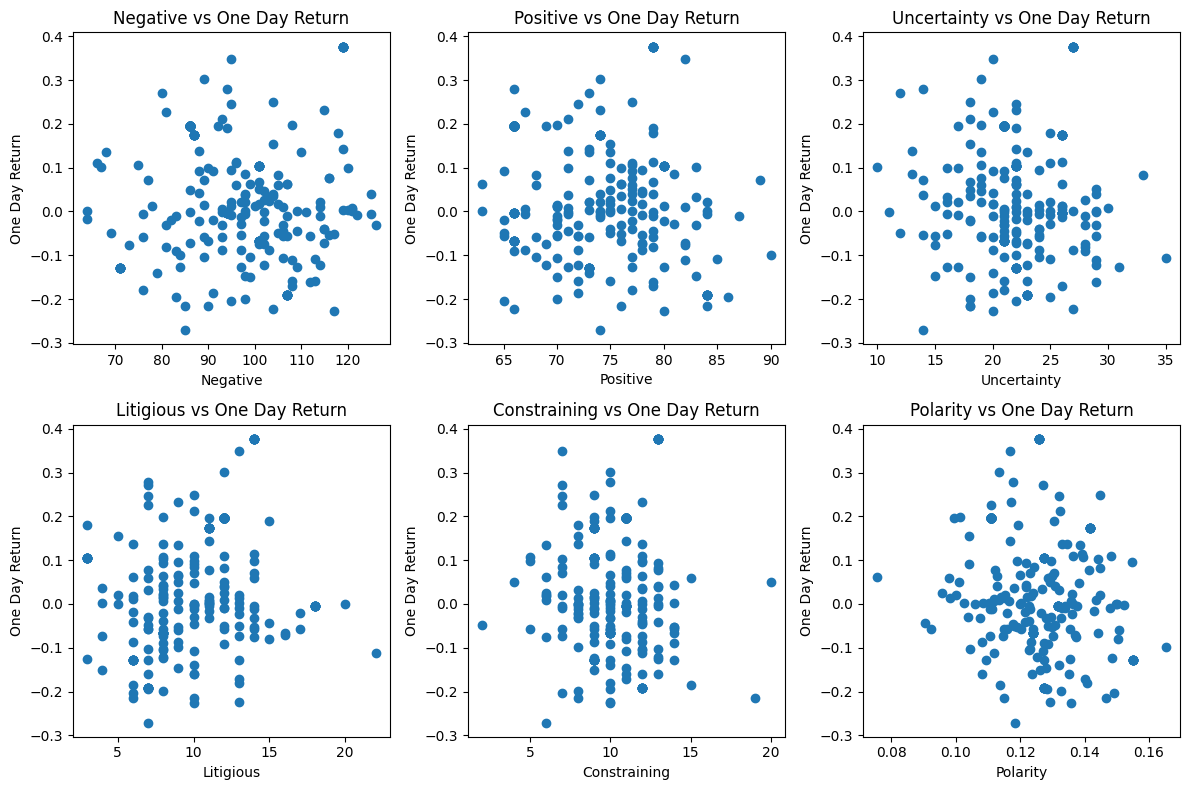

In [44]:
# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(df[feature], df['One Day Return'])
    ax.set_xlabel(labels[i])
    ax.set_ylabel('One Day Return')
    ax.set_title(f'{labels[i]} vs One Day Return')

plt.tight_layout()
plt.show()


In [46]:
df.to_csv("old.csv",index = False)

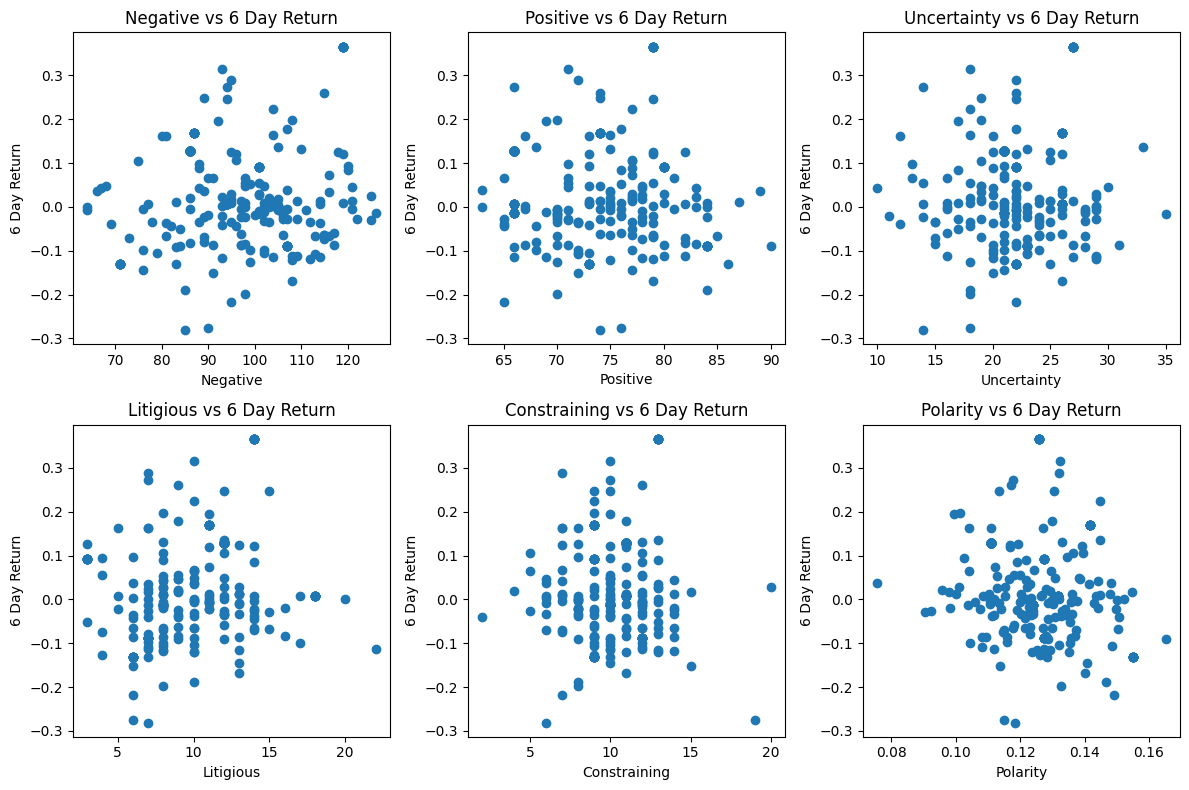

In [122]:
# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(df[feature], df['6 Day Return'])
    ax.set_xlabel(labels[i])
    ax.set_ylabel('6 Day Return')
    ax.set_title(f'{labels[i]} vs 6 Day Return')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    x = df[feature]
    y = df['6 Day Return']
    
    # Calculate the line of best fit
    fit = np.polyfit(x, y, 1)
    line = np.polyval(fit, x)
    
    # Calculate the correlation coefficient
    correlation = np.corrcoef(x, y)[0, 1]
    
    # Plot the scatter plot and line of best fit
    ax.scatter(x, y, label='Data')
    ax.plot(x, line, color='red', label='Line of Best Fit')
    ax.set_xlabel(labels[i])
    ax.set_ylabel('6 Day Return')
    ax.set_title(f'{labels[i]} vs 6 Day Return\nCorrelation: {correlation:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


In [124]:
# Calculate the correlation coefficients
df['Random Feature'] = df['Polarity']**2
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity', 'Random Feature']
correlations = df[features + ['7 Day Return']].corr()

# Print the correlation coefficients
print(correlations)

                negative  positive  uncertainty  litigious  constraining  \
negative        1.000000  0.348478     0.310216  -0.081739      0.279771   
positive        0.348478  1.000000     0.024136  -0.265426     -0.047721   
uncertainty     0.310216  0.024136     1.000000   0.284469      0.324486   
litigious      -0.081739 -0.265426     0.284469   1.000000      0.207690   
constraining    0.279771 -0.047721     0.324486   0.207690      1.000000   
Polarity       -0.169046  0.425008     0.048396  -0.090366     -0.233495   
Random Feature -0.184272  0.418274     0.049477  -0.098743     -0.244949   
7 Day Return   -0.106010 -0.313125    -0.043554   0.286894      0.051426   

                Polarity  Random Feature  7 Day Return  
negative       -0.169046       -0.184272     -0.106010  
positive        0.425008        0.418274     -0.313125  
uncertainty     0.048396        0.049477     -0.043554  
litigious      -0.090366       -0.098743      0.286894  
constraining   -0.233495      

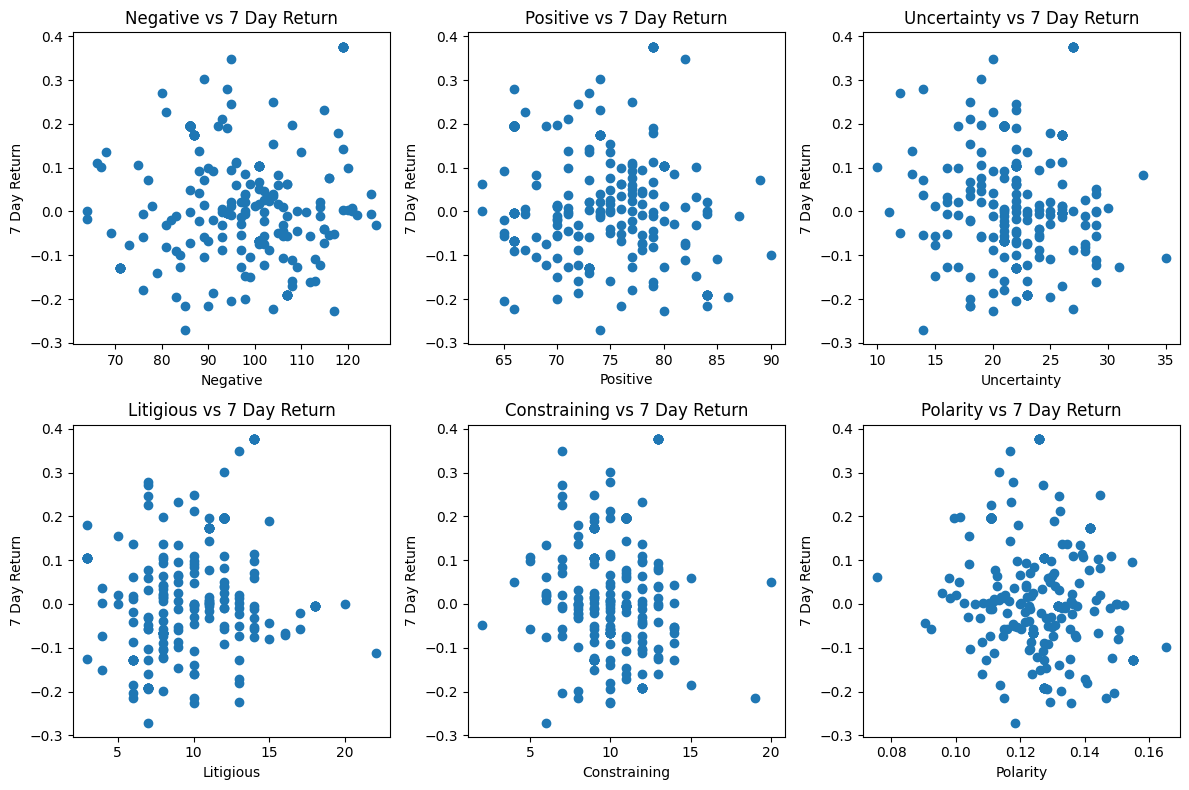

In [129]:
# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(df[feature], df['7 Day Return'])
    ax.set_xlabel(labels[i])
    ax.set_ylabel('7 Day Return')
    ax.set_title(f'{labels[i]} vs 7 Day Return')

plt.tight_layout()
plt.show()

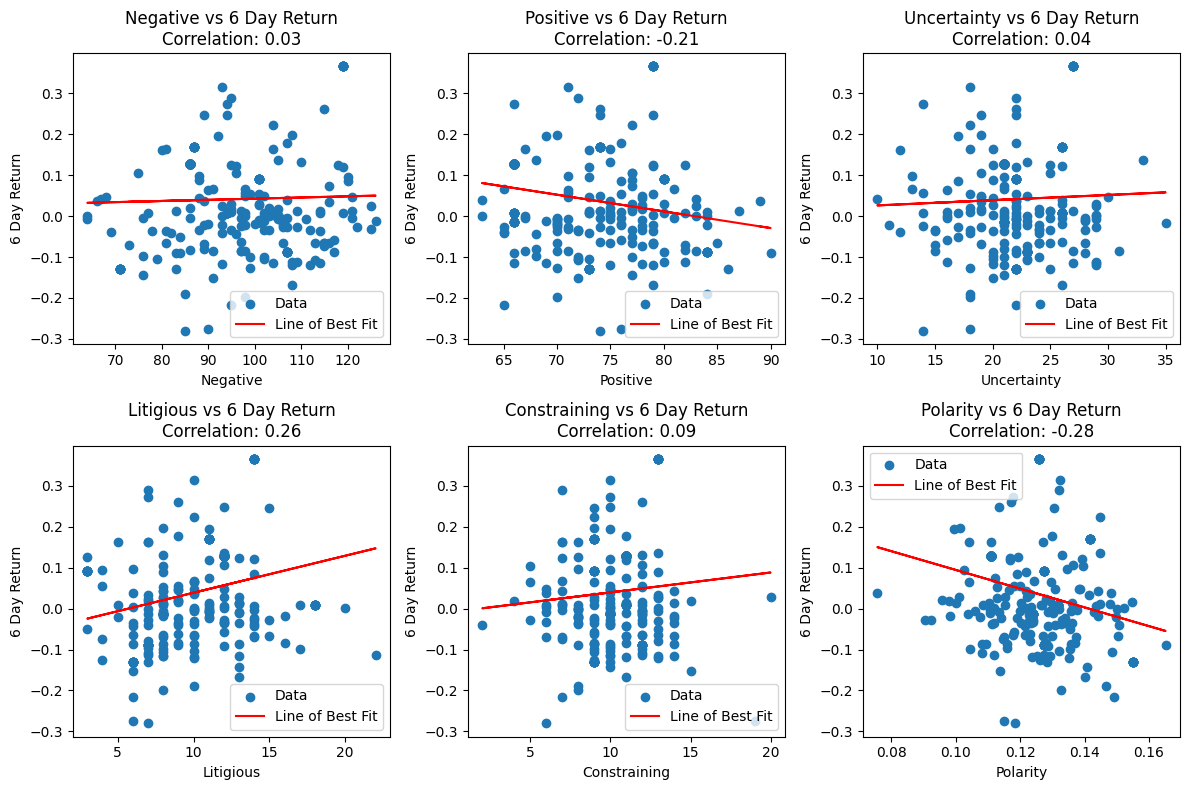

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    x = df[feature]
    y = df['6 Day Return']
    
    # Calculate the line of best fit
    fit = np.polyfit(x, y, 1)
    line = np.polyval(fit, x)
    
    # Calculate the correlation coefficient
    correlation = np.corrcoef(x, y)[0, 1]
    
    # Plot the scatter plot and line of best fit
    ax.scatter(x, y, label='Data')
    ax.plot(x, line, color='red', label='Line of Best Fit')
    ax.set_xlabel(labels[i])
    ax.set_ylabel('6 Day Return')
    ax.set_title(f'{labels[i]} vs 6 Day Return\nCorrelation: {correlation:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


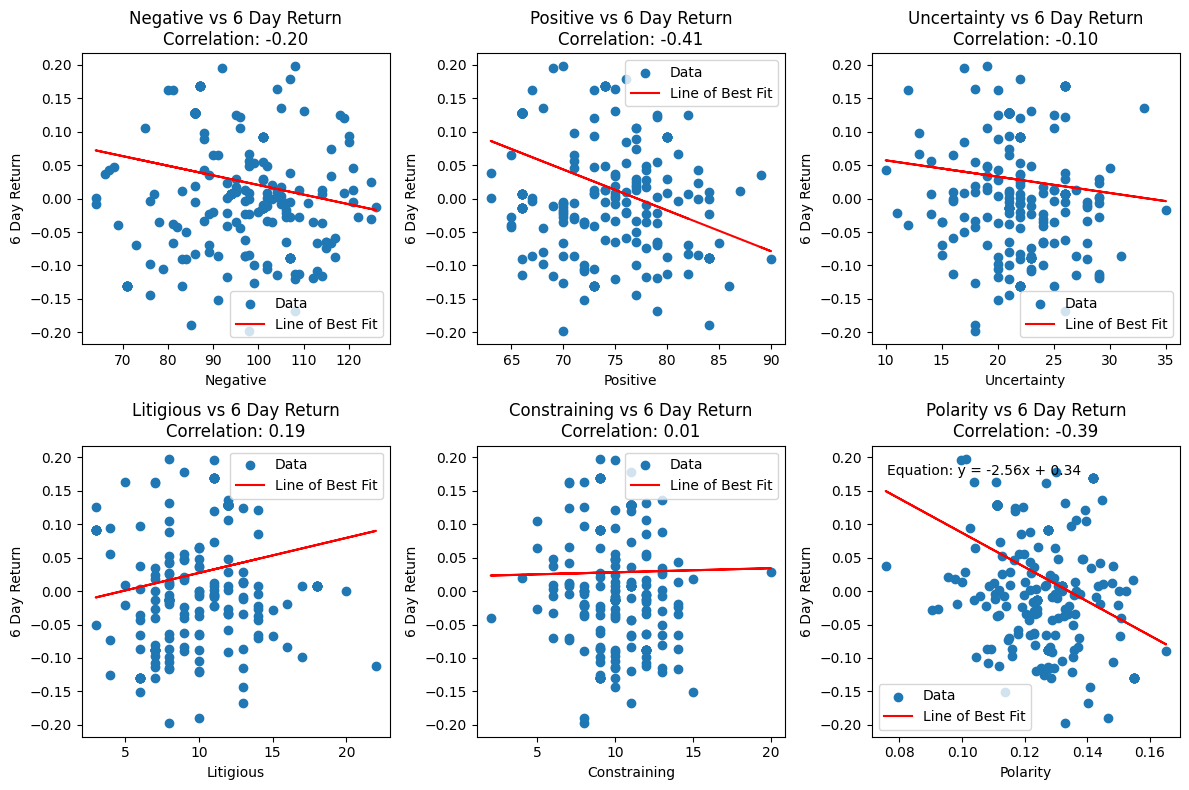

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    x = df[feature]
    y = df['6 Day Return']
    
    # Filter out data points with 'Negative' < -0.2 and '6 Day Return' > 0.2
    mask = (y >= -0.2) & (y <= 0.2)
    x_filtered = x[mask]
    y_filtered = y[mask]
    
        # Calculate the line of best fit
    fit = np.polyfit(x_filtered, y_filtered, 1)
    line = np.polyval(fit, x_filtered)
    
    # Calculate the correlation coefficient
    correlation = np.corrcoef(x_filtered, y_filtered)[0, 1]
    
    # Plot the scatter plot and line of best fit
    ax.scatter(x_filtered, y_filtered, label='Data')
    ax.plot(x_filtered, line, color='red', label='Line of Best Fit')
    ax.set_xlabel(labels[i])
    ax.set_ylabel('6 Day Return')
    
    if feature == 'Polarity':
        # Print the equation of the line of best fit
        equation = f'Equation: y = {fit[0]:.2f}x + {fit[1]:.2f}'
        ax.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
    
    ax.set_title(f'{labels[i]} vs 6 Day Return\nCorrelation: {correlation:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


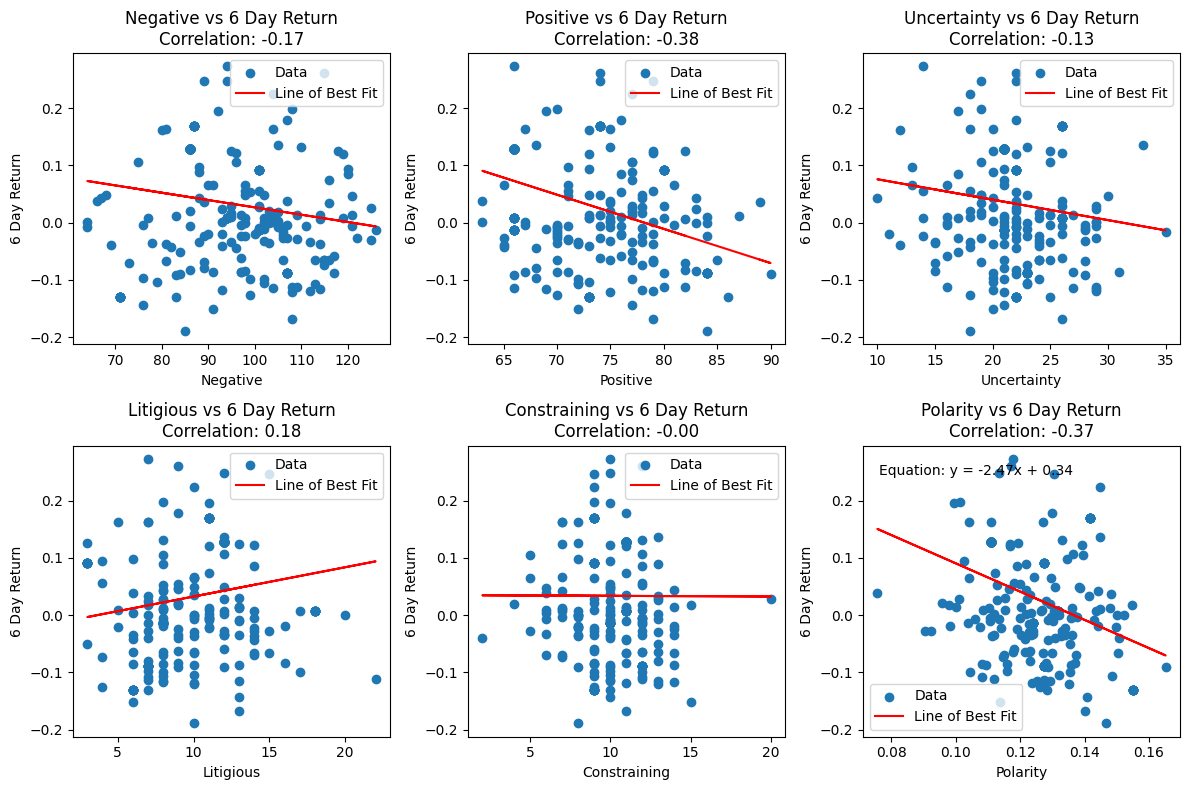

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Define the features and their corresponding labels
features = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']
labels = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining', 'Polarity']

# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    x = df[feature]
    y = df['6 Day Return']
    
    # Calculate the mean and standard deviation
    mean_y = np.mean(y)
    std_y = np.std(y)
    
    # Filter out data points above 2 standard deviations from the mean
    mask = np.abs(y - mean_y) <= 2 * std_y
    x_filtered = x[mask]
    y_filtered = y[mask]
    
    # Calculate the line of best fit
    fit = np.polyfit(x_filtered, y_filtered, 1)
    line = np.polyval(fit, x_filtered)
    
    # Calculate the correlation coefficient
    correlation = np.corrcoef(x_filtered, y_filtered)[0, 1]
    
    # Plot the scatter plot and line of best fit
    ax.scatter(x_filtered, y_filtered, label='Data')
    ax.plot(x_filtered, line, color='red', label='Line of Best Fit')
    ax.set_xlabel(labels[i])
    ax.set_ylabel('6 Day Return')
    
    if feature == 'Polarity':
        # Print the equation of the line of best fit
        equation = f'Equation: y = {fit[0]:.2f}x + {fit[1]:.2f}'
        ax.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
    
    ax.set_title(f'{labels[i]} vs 6 Day Return\nCorrelation: {correlation:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


In [161]:
import pandas as pd
import numpy as np


# Calculate the line of best fit for Polarity vs 6 Day Return
fit = np.polyfit(df['Polarity'], df['6 Day Return'], 1)
line = np.polyval(fit, df['Polarity'])

# Initialize the portfolio with $1000
initial_investment = 1000

# Calculate the weights for an equally invested portfolio
num_data_points = len(df)
weights = np.ones(num_data_points) / num_data_points

# Determine positions and calculate gains/losses
positions = np.where(line > 0, 'Long', 'Short')
gains_losses = np.where(positions == 'Long', df['6 Day Return'], -df['6 Day Return'])

# Calculate the portfolio's return over the 6-day period
portfolio_return = np.sum(weights * gains_losses)

# Calculate the final portfolio value
final_portfolio_value = initial_investment * (1 + portfolio_return)

# Print the final portfolio value, return, gains, and losses
print(f'Initial Portfolio Value: ${initial_investment:.2f}')
print(f'Final Portfolio Value: ${final_portfolio_value:.2f}')
print(f'Return: {portfolio_return * 100:.2f}%')

for i, (position, ticker, gain_loss) in enumerate(zip(positions, df['Ticker'], gains_losses)):
    print(f"Day {i+1} - Ticker: {ticker}, Position: {position}, Gain/Loss: ${gain_loss:.2f}")


Initial Portfolio Value: $1000.00
Final Portfolio Value: $1040.71
Return: 4.07%
Day 1 - Ticker: FDX, Position: Long, Gain/Loss: $-0.07
Day 2 - Ticker: FDX, Position: Long, Gain/Loss: $-0.03
Day 3 - Ticker: CAG, Position: Long, Gain/Loss: $0.11
Day 4 - Ticker: COF, Position: Long, Gain/Loss: $0.03
Day 5 - Ticker: SO, Position: Short, Gain/Loss: $0.01
Day 6 - Ticker: FDX, Position: Short, Gain/Loss: $-0.01
Day 7 - Ticker: COF, Position: Long, Gain/Loss: $-0.03
Day 8 - Ticker: IP, Position: Long, Gain/Loss: $0.00
Day 9 - Ticker: BWA, Position: Short, Gain/Loss: $-0.00
Day 10 - Ticker: JCI, Position: Long, Gain/Loss: $-0.00
Day 11 - Ticker: SO, Position: Long, Gain/Loss: $-0.00
Day 12 - Ticker: DE, Position: Long, Gain/Loss: $-0.10
Day 13 - Ticker: CAG, Position: Long, Gain/Loss: $0.00
Day 14 - Ticker: COF, Position: Long, Gain/Loss: $-0.01
Day 15 - Ticker: NOC, Position: Long, Gain/Loss: $-0.00
Day 16 - Ticker: COP, Position: Long, Gain/Loss: $-0.02
Day 17 - Ticker: BWA, Position: Long, G

In [140]:
"""
# Prepare the independent variables
X = df[['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']].values

# Prepare the dependent variable
y = df['7 Day Return'].values

# Create an instance of the LinearRegression model
regression = LinearRegression()

# Fit the model to the data
regression.fit(X, y)

# Retrieve the coefficients and intercept
coefficients = regression.coef_
intercept = regression.intercept_

# Obtain predictions for linear regression
y_pred_linear = regression.predict(X)

# Calculate MSE for linear regression
mse_linear = mean_squared_error(y, y_pred_linear)

# Calculate RMSE for linear regression
rmse_linear = np.sqrt(mse_linear)

# Calculate MAE for linear regression
mae_linear = mean_absolute_error(y, y_pred_linear)

# Calculate R-squared for linear regression
r2_linear = r2_score(y, y_pred_linear)

# Print the coefficients and intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)

# Print the evaluation metrics
print('Linear Regression MSE:', mse_linear)
print('Linear Regression RMSE:', rmse_linear)
print('Linear Regression MAE:', mae_linear)
print('Linear Regression R-squared:', r2_linear)
"""

"\n# Prepare the independent variables\nX = df[['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'Polarity']].values\n\n# Prepare the dependent variable\ny = df['7 Day Return'].values\n\n# Create an instance of the LinearRegression model\nregression = LinearRegression()\n\n# Fit the model to the data\nregression.fit(X, y)\n\n# Retrieve the coefficients and intercept\ncoefficients = regression.coef_\nintercept = regression.intercept_\n\n# Obtain predictions for linear regression\ny_pred_linear = regression.predict(X)\n\n# Calculate MSE for linear regression\nmse_linear = mean_squared_error(y, y_pred_linear)\n\n# Calculate RMSE for linear regression\nrmse_linear = np.sqrt(mse_linear)\n\n# Calculate MAE for linear regression\nmae_linear = mean_absolute_error(y, y_pred_linear)\n\n# Calculate R-squared for linear regression\nr2_linear = r2_score(y, y_pred_linear)\n\n# Print the coefficients and intercept\nprint('Coefficients:', coefficients)\nprint('Intercept:', intercept